#Machine learning for intrusion detection.

A simulação demonstra a aplicação de técnicas de aprendizado de máquina, especificamente utilizando o algoritmo Isolation Forest, para detectar anomalias nos padrões de acesso de uma aplicação web. Os dados foram simulados com padrões normais e anomalias, onde os padrões normais têm um tempo médio de sessão de 20 unidades e um número médio de requisições de 50, enquanto as anomalias têm um tempo médio de sessão de 25 unidades e um número médio de requisições de 70. O Isolation Forest identifica anomalias isolando instâncias que se destacam significativamente dos padrões normais.

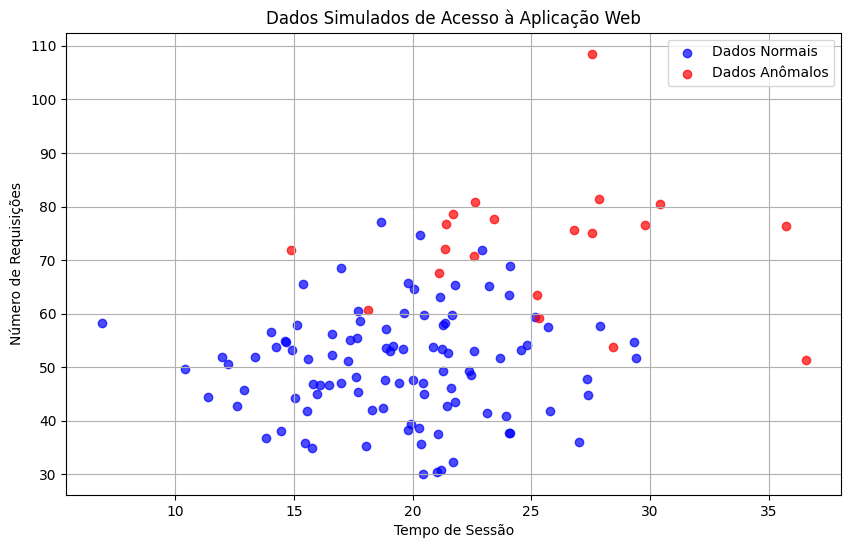

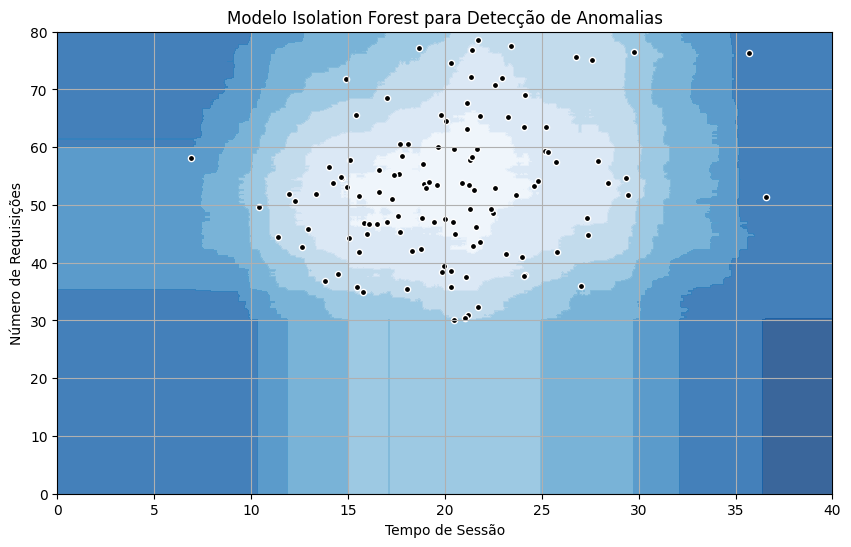

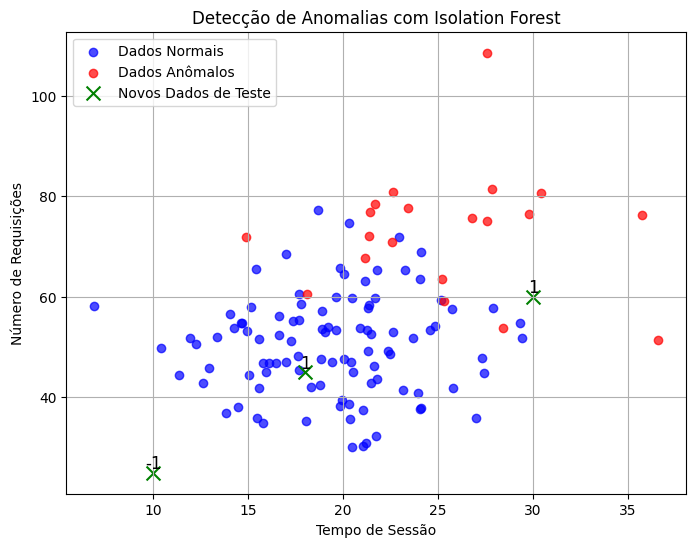

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Simulação de dados de acesso (exemplo simplificado)
np.random.seed(42)
normal_data = np.random.normal(loc=[20, 50], scale=[5, 10], size=(100, 2))
anomalous_data = np.random.normal(loc=[25, 70], scale=[5, 10], size=(20, 2))  # Dados anômalos
X_train = np.vstack([normal_data, anomalous_data])
y_train = np.ones(len(X_train))
y_train[len(normal_data):] = -1

# Plotagem dos dados simulados
plt.figure(figsize=(10, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], label='Dados Normais', color='blue', alpha=0.7)
plt.scatter(anomalous_data[:, 0], anomalous_data[:, 1], label='Dados Anômalos', color='red', alpha=0.7)
plt.title('Dados Simulados de Acesso à Aplicação Web')
plt.xlabel('Tempo de Sessão')
plt.ylabel('Número de Requisições')
plt.legend()
plt.grid(True)
plt.show()

# Treinamento do modelo Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train)

# Previsão do modelo nos dados de treinamento para visualizar a separação
xx, yy = np.meshgrid(np.linspace(0, 40, 500), np.linspace(0, 80, 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotagem da decisão do modelo
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r, alpha=0.8)

# Plotagem dos dados de treinamento
plt.scatter(X_train[:, 0], X_train[:, 1], color='k', s=20, edgecolor='w')
plt.title('Modelo Isolation Forest para Detecção de Anomalias')
plt.xlabel('Tempo de Sessão')
plt.ylabel('Número de Requisições')
plt.grid(True)
plt.xlim((0, 40))
plt.ylim((0, 80))
plt.show()

# Simulação de novos dados para teste
new_data = np.array([[18, 45], [10, 25], [30, 60]])

# Previsão do modelo nos novos dados
predictions = model.predict(new_data)

# Plotagem dos resultados da detecção
plt.figure(figsize=(8, 6))
plt.scatter(normal_data[:, 0], normal_data[:, 1], label='Dados Normais', color='blue', alpha=0.7)
plt.scatter(anomalous_data[:, 0], anomalous_data[:, 1], label='Dados Anômalos', color='red', alpha=0.7)
plt.scatter(new_data[:, 0], new_data[:, 1], marker='x', s=100, color='green', label='Novos Dados de Teste')
for i, txt in enumerate(predictions):
    plt.annotate(txt, (new_data[i, 0], new_data[i, 1]), fontsize=12, color='black', ha='center', va='bottom')
plt.title('Detecção de Anomalias com Isolation Forest')
plt.xlabel('Tempo de Sessão')
plt.ylabel('Número de Requisições')
plt.legend()
plt.grid(True)
plt.show()
